# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

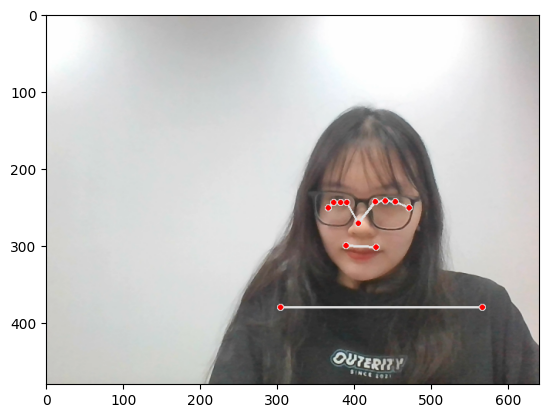

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [9]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [10]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [12]:
result_test = extract_keypoints(results)

In [13]:
result_test

array([ 6.33269846e-01,  5.66080391e-01, -1.50865936e+00,  9.99344647e-01,
        6.68503523e-01,  5.06908476e-01, -1.48086524e+00,  9.98614907e-01,
        6.88927293e-01,  5.06168723e-01, -1.48124945e+00,  9.98611927e-01,
        7.07934439e-01,  5.06535947e-01, -1.48153389e+00,  9.98467743e-01,
        6.10918880e-01,  5.08933127e-01, -1.45891297e+00,  9.98676240e-01,
        5.97702861e-01,  5.08861303e-01, -1.45857787e+00,  9.98730421e-01,
        5.82854033e-01,  5.09352922e-01, -1.45919836e+00,  9.98881757e-01,
        7.36310482e-01,  5.24911165e-01, -1.08538163e+00,  9.98577654e-01,
        5.73013306e-01,  5.24971724e-01, -9.66936409e-01,  9.99141276e-01,
        6.70309722e-01,  6.29798949e-01, -1.34416604e+00,  9.99398351e-01,
        6.07903004e-01,  6.25912011e-01, -1.31131732e+00,  9.99509335e-01,
        8.84764671e-01,  7.93063045e-01, -6.98037326e-01,  9.90562379e-01,
        4.76182848e-01,  7.93605924e-01, -5.64210594e-01,  9.97309446e-01,
        9.62362945e-01,  

In [14]:
np.save('0', result_test)

In [15]:
np.load('0.npy')

array([ 6.33269846e-01,  5.66080391e-01, -1.50865936e+00,  9.99344647e-01,
        6.68503523e-01,  5.06908476e-01, -1.48086524e+00,  9.98614907e-01,
        6.88927293e-01,  5.06168723e-01, -1.48124945e+00,  9.98611927e-01,
        7.07934439e-01,  5.06535947e-01, -1.48153389e+00,  9.98467743e-01,
        6.10918880e-01,  5.08933127e-01, -1.45891297e+00,  9.98676240e-01,
        5.97702861e-01,  5.08861303e-01, -1.45857787e+00,  9.98730421e-01,
        5.82854033e-01,  5.09352922e-01, -1.45919836e+00,  9.98881757e-01,
        7.36310482e-01,  5.24911165e-01, -1.08538163e+00,  9.98577654e-01,
        5.73013306e-01,  5.24971724e-01, -9.66936409e-01,  9.99141276e-01,
        6.70309722e-01,  6.29798949e-01, -1.34416604e+00,  9.99398351e-01,
        6.07903004e-01,  6.25912011e-01, -1.31131732e+00,  9.99509335e-01,
        8.84764671e-01,  7.93063045e-01, -6.98037326e-01,  9.90562379e-01,
        4.76182848e-01,  7.93605924e-01, -5.64210594e-01,  9.97309446e-01,
        9.62362945e-01,  

# 4. Setup Folders for Collection

In [16]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 
print(DATA_PATH)

# Actions that we try to detect
actions = np.array(['handsup', 'ok', 'sayhi'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

MP_Data


In [17]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(0, no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [18]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences aka videos
#         for sequence in range(start_folder, start_folder + no_sequences):
#             # Loop through video length aka sequence length
#             print(sequence_length)
#             for frame_num in range(sequence_length):
#                 print(frame_num)
#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)
                
#                 # NEW Apply wait logic
#                 if frame_num == 0:
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(500)
#                 else:
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num ))
#                 print(npy_path, keypoints)
#                 np.save(npy_path, keypoints)

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                    
#     cap.release()
#     cv2.destroyAllWindows()

In [19]:
# cap.release()
# cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'handsup': 0, 'ok': 1, 'sayhi': 2}

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        print(sequence, action)
        window = []
        for frame_num in range(sequence_length-1):
            if sequence < 30:
                res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
                window.append(res)
        if sequence < 30:
            sequences.append(window)
            labels.append(label_map[action])

0 handsup
1 handsup
10 handsup
100 handsup
101 handsup
102 handsup
103 handsup
104 handsup
105 handsup
106 handsup
107 handsup
108 handsup
109 handsup
11 handsup
110 handsup
111 handsup
112 handsup
113 handsup
114 handsup
115 handsup
116 handsup
117 handsup
118 handsup
119 handsup
12 handsup
120 handsup
121 handsup
122 handsup
123 handsup
124 handsup
125 handsup
126 handsup
127 handsup
128 handsup
129 handsup
13 handsup
130 handsup
131 handsup
132 handsup
133 handsup
134 handsup
135 handsup
136 handsup
137 handsup
138 handsup
139 handsup
14 handsup
140 handsup
141 handsup
142 handsup
143 handsup
144 handsup
145 handsup
146 handsup
147 handsup
148 handsup
149 handsup
15 handsup
150 handsup
151 handsup
152 handsup
153 handsup
154 handsup
155 handsup
156 handsup
157 handsup
158 handsup
159 handsup
16 handsup
160 handsup
161 handsup
162 handsup
163 handsup
164 handsup
165 handsup
166 handsup
167 handsup
168 handsup
169 handsup
17 handsup
170 handsup
171 handsup
172 handsup
173 handsup
174 

In [24]:
np.array(sequences).shape

(90, 29, 258)

In [25]:
np.array(labels).shape

(90,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape

(90, 29, 258)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [30]:
y_test.shape

(5, 3)

In [31]:
X_test.shape

(5, 29, 258)

# 7. Build and Train LSTM Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [34]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(29,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [35]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [36]:
X_train.shape

(85, 29, 258)

In [37]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 274ms/step - loss: 1.0862 - categorical_accuracy: 0.3369
Epoch 2/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.7937 - categorical_accuracy: 0.5364
Epoch 3/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.2686 - categorical_accuracy: 0.9902
Epoch 4/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.7578 - categorical_accuracy: 0.8180
Epoch 5/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.2949 - categorical_accuracy: 0.9628
Epoch 6/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1723 - categorical_accuracy: 0.9824
Epoch 7/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.1357 - categorical_accuracy: 0.9824
Epoch 8/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0889 - categorical_accuracy: 0.9608
Epoch 9/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.1096 - categorical_accuracy: 0.9296


3/3 [==============================] - 0s 40ms/step - loss: 1.6512e-04 - categorical_accuracy: 1.0000
Epoch 74/2000
3/3 [==============================] - 0s 41ms/step - loss: 7.5431e-05 - categorical_accuracy: 1.0000
Epoch 75/2000
3/3 [==============================] - 0s 41ms/step - loss: 3.4391e-05 - categorical_accuracy: 1.0000
Epoch 76/2000
3/3 [==============================] - 0s 42ms/step - loss: 2.9010e-05 - categorical_accuracy: 1.0000
Epoch 77/2000
3/3 [==============================] - 0s 41ms/step - loss: 2.7481e-05 - categorical_accuracy: 1.0000
Epoch 78/2000
3/3 [==============================] - 0s 41ms/step - loss: 2.1670e-05 - categorical_accuracy: 1.0000
Epoch 79/2000
3/3 [==============================] - 0s 39ms/step - loss: 1.9113e-05 - categorical_accuracy: 1.0000
Epoch 80/2000
3/3 [==============================] - 0s 42ms/step - loss: 2.8665e-05 - categorical_accuracy: 1.0000
Epoch 81/2000
3/3 [==============================] - 0s 42ms/step - loss: 4.5800e-05 -

3/3 [==============================] - 0s 59ms/step - loss: 9.6607e-07 - categorical_accuracy: 1.0000
Epoch 145/2000
3/3 [==============================] - 0s 63ms/step - loss: 9.0465e-07 - categorical_accuracy: 1.0000
Epoch 146/2000
3/3 [==============================] - 0s 49ms/step - loss: 8.6048e-07 - categorical_accuracy: 1.0000
Epoch 147/2000
3/3 [==============================] - 0s 46ms/step - loss: 8.1679e-07 - categorical_accuracy: 1.0000
Epoch 148/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.2835e-06 - categorical_accuracy: 1.0000
Epoch 149/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.2177e-06 - categorical_accuracy: 1.0000
Epoch 150/2000
3/3 [==============================] - 0s 48ms/step - loss: 7.0069e-07 - categorical_accuracy: 1.0000
Epoch 151/2000
3/3 [==============================] - 0s 49ms/step - loss: 2.0186e-06 - categorical_accuracy: 1.0000
Epoch 152/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.07

3/3 [==============================] - 0s 59ms/step - loss: 5.8843e-07 - categorical_accuracy: 1.0000
Epoch 215/2000
3/3 [==============================] - 0s 62ms/step - loss: 3.2928e-07 - categorical_accuracy: 1.0000
Epoch 216/2000
3/3 [==============================] - 0s 67ms/step - loss: 5.6605e-07 - categorical_accuracy: 1.0000
Epoch 217/2000
3/3 [==============================] - 0s 69ms/step - loss: 5.6558e-07 - categorical_accuracy: 1.0000
Epoch 218/2000
3/3 [==============================] - 0s 60ms/step - loss: 3.1248e-07 - categorical_accuracy: 1.0000
Epoch 219/2000
3/3 [==============================] - 0s 51ms/step - loss: 3.0525e-07 - categorical_accuracy: 1.0000
Epoch 220/2000
3/3 [==============================] - 0s 50ms/step - loss: 2.9825e-07 - categorical_accuracy: 1.0000
Epoch 221/2000
3/3 [==============================] - 0s 49ms/step - loss: 5.2502e-07 - categorical_accuracy: 1.0000
Epoch 222/2000
3/3 [==============================] - 0s 52ms/step - loss: 2.96

3/3 [==============================] - 0s 63ms/step - loss: 2.0913e-07 - categorical_accuracy: 1.0000
Epoch 285/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.1599e-07 - categorical_accuracy: 1.0000
Epoch 286/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1762e-07 - categorical_accuracy: 1.0000
Epoch 287/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1319e-07 - categorical_accuracy: 1.0000
Epoch 288/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.0097e-07 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.1691e-07 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1668e-07 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.9234e-07 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 69ms/step - loss: 6.77

3/3 [==============================] - 0s 61ms/step - loss: 6.4173e-08 - categorical_accuracy: 1.0000
Epoch 355/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0981e-07 - categorical_accuracy: 1.0000
Epoch 356/2000
3/3 [==============================] - 0s 61ms/step - loss: 3.9258e-08 - categorical_accuracy: 1.0000
Epoch 357/2000
3/3 [==============================] - 0s 61ms/step - loss: 6.0213e-08 - categorical_accuracy: 1.0000
Epoch 358/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0189e-07 - categorical_accuracy: 1.0000
Epoch 359/2000
3/3 [==============================] - 0s 62ms/step - loss: 6.0443e-08 - categorical_accuracy: 1.0000
Epoch 360/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0608e-07 - categorical_accuracy: 1.0000
Epoch 361/2000
3/3 [==============================] - 0s 60ms/step - loss: 5.6482e-08 - categorical_accuracy: 1.0000
Epoch 362/2000
3/3 [==============================] - 0s 60ms/step - loss: 3.78

3/3 [==============================] - 0s 71ms/step - loss: 6.5516e-08 - categorical_accuracy: 1.0000
Epoch 425/2000
3/3 [==============================] - 0s 67ms/step - loss: 2.7797e-08 - categorical_accuracy: 1.0000
Epoch 426/2000
3/3 [==============================] - 0s 69ms/step - loss: 6.5516e-08 - categorical_accuracy: 1.0000
Epoch 427/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.8027e-08 - categorical_accuracy: 1.0000
Epoch 428/2000
3/3 [==============================] - 0s 69ms/step - loss: 6.3417e-08 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 64ms/step - loss: 2.8027e-08 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 0s 69ms/step - loss: 3.9669e-08 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 0s 75ms/step - loss: 6.5746e-08 - categorical_accuracy: 1.0000
Epoch 432/2000
3/3 [==============================] - 0s 66ms/step - loss: 3.96

3/3 [==============================] - 0s 53ms/step - loss: 4.5465e-08 - categorical_accuracy: 1.0000
Epoch 495/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.9618e-08 - categorical_accuracy: 1.0000
Epoch 496/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.8687e-08 - categorical_accuracy: 1.0000
Epoch 497/2000
3/3 [==============================] - 0s 62ms/step - loss: 4.6161e-08 - categorical_accuracy: 1.0000
Epoch 498/2000
3/3 [==============================] - 0s 70ms/step - loss: 4.3367e-08 - categorical_accuracy: 1.0000
Epoch 499/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.6824e-08 - categorical_accuracy: 1.0000
Epoch 500/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.5206e-08 - categorical_accuracy: 1.0000
Epoch 501/2000
3/3 [==============================] - 0s 64ms/step - loss: 4.4764e-08 - categorical_accuracy: 1.0000
Epoch 502/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.84

3/3 [==============================] - 0s 51ms/step - loss: 3.1944e-08 - categorical_accuracy: 1.0000
Epoch 565/2000
3/3 [==============================] - 0s 52ms/step - loss: 2.1234e-08 - categorical_accuracy: 1.0000
Epoch 566/2000
3/3 [==============================] - 0s 52ms/step - loss: 2.1700e-08 - categorical_accuracy: 1.0000
Epoch 567/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.9837e-08 - categorical_accuracy: 1.0000
Epoch 568/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.1234e-08 - categorical_accuracy: 1.0000
Epoch 569/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.0768e-08 - categorical_accuracy: 1.0000
Epoch 570/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.9371e-08 - categorical_accuracy: 1.0000
Epoch 571/2000
3/3 [==============================] - 0s 53ms/step - loss: 3.2640e-08 - categorical_accuracy: 1.0000
Epoch 572/2000
3/3 [==============================] - 0s 53ms/step - loss: 3.03

3/3 [==============================] - 0s 102ms/step - loss: 1.5170e-08 - categorical_accuracy: 1.0000
Epoch 635/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.7277e-08 - categorical_accuracy: 1.0000
Epoch 636/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.7032e-08 - categorical_accuracy: 1.0000
Epoch 637/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.2376e-08 - categorical_accuracy: 1.0000
Epoch 638/2000
3/3 [==============================] - 0s 69ms/step - loss: 9.5817e-09 - categorical_accuracy: 1.0000
Epoch 639/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.5414e-08 - categorical_accuracy: 1.0000
Epoch 640/2000
3/3 [==============================] - 0s 80ms/step - loss: 2.5880e-08 - categorical_accuracy: 1.0000
Epoch 641/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.3307e-08 - categorical_accuracy: 1.0000
Epoch 642/2000
3/3 [==============================] - 0s 105ms/step - loss: 2.

3/3 [==============================] - 0s 128ms/step - loss: 1.1203e-08 - categorical_accuracy: 1.0000
Epoch 704/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.3532e-08 - categorical_accuracy: 1.0000
Epoch 705/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.8188e-08 - categorical_accuracy: 1.0000
Epoch 706/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.7723e-08 - categorical_accuracy: 1.0000
Epoch 707/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.4463e-08 - categorical_accuracy: 1.0000
Epoch 708/2000
3/3 [==============================] - 0s 118ms/step - loss: 7.4780e-09 - categorical_accuracy: 1.0000
Epoch 709/2000
3/3 [==============================] - 0s 129ms/step - loss: 1.7257e-08 - categorical_accuracy: 1.0000
Epoch 710/2000
3/3 [==============================] - 0s 122ms/step - loss: 9.3406e-09 - categorical_accuracy: 1.0000
Epoch 711/2000
3/3 [==============================] - 0s 114ms/step - l

3/3 [==============================] - 0s 94ms/step - loss: 7.4725e-09 - categorical_accuracy: 1.0000
Epoch 773/2000
3/3 [==============================] - 0s 91ms/step - loss: 7.4725e-09 - categorical_accuracy: 1.0000
Epoch 774/2000
3/3 [==============================] - 0s 98ms/step - loss: 7.4725e-09 - categorical_accuracy: 1.0000
Epoch 775/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.5854e-08 - categorical_accuracy: 1.0000
Epoch 776/2000
3/3 [==============================] - 0s 100ms/step - loss: 6.0755e-09 - categorical_accuracy: 1.0000
Epoch 777/2000
3/3 [==============================] - 0s 104ms/step - loss: 9.8008e-09 - categorical_accuracy: 1.0000
Epoch 778/2000
3/3 [==============================] - 0s 100ms/step - loss: 9.3351e-09 - categorical_accuracy: 1.0000
Epoch 779/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.1894e-08 - categorical_accuracy: 1.0000
Epoch 780/2000
3/3 [==============================] - 0s 111ms/step - loss

3/3 [==============================] - 0s 128ms/step - loss: 9.0941e-09 - categorical_accuracy: 1.0000
Epoch 842/2000
3/3 [==============================] - 0s 109ms/step - loss: 5.3688e-09 - categorical_accuracy: 1.0000
Epoch 843/2000
3/3 [==============================] - 0s 140ms/step - loss: 9.5598e-09 - categorical_accuracy: 1.0000
Epoch 844/2000
3/3 [==============================] - 0s 116ms/step - loss: 6.7658e-09 - categorical_accuracy: 1.0000
Epoch 845/2000
3/3 [==============================] - 0s 132ms/step - loss: 5.8345e-09 - categorical_accuracy: 1.0000
Epoch 846/2000
3/3 [==============================] - 0s 117ms/step - loss: 9.0941e-09 - categorical_accuracy: 1.0000
Epoch 847/2000
3/3 [==============================] - 0s 106ms/step - loss: 5.8345e-09 - categorical_accuracy: 1.0000
Epoch 848/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.0491e-08 - categorical_accuracy: 1.0000
Epoch 849/2000
3/3 [==============================] - 0s 118ms/step - l

3/3 [==============================] - 0s 104ms/step - loss: 5.5989e-09 - categorical_accuracy: 1.0000
Epoch 911/2000
3/3 [==============================] - 0s 109ms/step - loss: 8.3929e-09 - categorical_accuracy: 1.0000
Epoch 912/2000
3/3 [==============================] - 0s 108ms/step - loss: 3.2706e-09 - categorical_accuracy: 1.0000
Epoch 913/2000
3/3 [==============================] - 0s 154ms/step - loss: 4.2019e-09 - categorical_accuracy: 1.0000
Epoch 914/2000
3/3 [==============================] - 0s 125ms/step - loss: 5.5989e-09 - categorical_accuracy: 1.0000
Epoch 915/2000
3/3 [==============================] - 0s 117ms/step - loss: 6.9959e-09 - categorical_accuracy: 1.0000
Epoch 916/2000
3/3 [==============================] - 0s 127ms/step - loss: 6.9959e-09 - categorical_accuracy: 1.0000
Epoch 917/2000
3/3 [==============================] - 0s 120ms/step - loss: 6.9959e-09 - categorical_accuracy: 1.0000
Epoch 918/2000
3/3 [==============================] - 0s 119ms/step - l

3/3 [==============================] - 0s 134ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 980/2000
3/3 [==============================] - 0s 125ms/step - loss: 4.6676e-09 - categorical_accuracy: 1.0000
Epoch 981/2000
3/3 [==============================] - 0s 121ms/step - loss: 6.9959e-09 - categorical_accuracy: 1.0000
Epoch 982/2000
3/3 [==============================] - 0s 109ms/step - loss: 8.3929e-09 - categorical_accuracy: 1.0000
Epoch 983/2000
3/3 [==============================] - 0s 112ms/step - loss: 4.2019e-09 - categorical_accuracy: 1.0000
Epoch 984/2000
3/3 [==============================] - 0s 144ms/step - loss: 8.3929e-09 - categorical_accuracy: 1.0000
Epoch 985/2000
3/3 [==============================] - 1s 203ms/step - loss: 8.3929e-09 - categorical_accuracy: 1.0000
Epoch 986/2000
3/3 [==============================] - 0s 141ms/step - loss: 5.5989e-09 - categorical_accuracy: 1.0000
Epoch 987/2000
3/3 [==============================] - 0s 171ms/step - l

3/3 [==============================] - 0s 144ms/step - loss: 4.8977e-09 - categorical_accuracy: 1.0000
Epoch 1049/2000
3/3 [==============================] - 0s 118ms/step - loss: 3.0350e-09 - categorical_accuracy: 1.0000
Epoch 1050/2000
3/3 [==============================] - 0s 139ms/step - loss: 5.3633e-09 - categorical_accuracy: 1.0000
Epoch 1051/2000
3/3 [==============================] - 0s 158ms/step - loss: 4.4320e-09 - categorical_accuracy: 1.0000
Epoch 1052/2000
3/3 [==============================] - 1s 169ms/step - loss: 4.4320e-09 - categorical_accuracy: 1.0000
Epoch 1053/2000
3/3 [==============================] - 0s 135ms/step - loss: 4.4320e-09 - categorical_accuracy: 1.0000
Epoch 1054/2000
3/3 [==============================] - 0s 114ms/step - loss: 6.2946e-09 - categorical_accuracy: 1.0000
Epoch 1055/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.5694e-09 - categorical_accuracy: 1.0000
Epoch 1056/2000
3/3 [==============================] - 0s 113ms/

3/3 [==============================] - 0s 99ms/step - loss: 3.5007e-09 - categorical_accuracy: 1.0000
Epoch 1118/2000
3/3 [==============================] - 0s 101ms/step - loss: 4.8977e-09 - categorical_accuracy: 1.0000
Epoch 1119/2000
3/3 [==============================] - 0s 108ms/step - loss: 2.1037e-09 - categorical_accuracy: 1.0000
Epoch 1120/2000
3/3 [==============================] - 0s 103ms/step - loss: 4.4320e-09 - categorical_accuracy: 1.0000
Epoch 1121/2000
3/3 [==============================] - 0s 118ms/step - loss: 2.5694e-09 - categorical_accuracy: 1.0000
Epoch 1122/2000
3/3 [==============================] - 0s 112ms/step - loss: 3.5007e-09 - categorical_accuracy: 1.0000
Epoch 1123/2000
3/3 [==============================] - 0s 105ms/step - loss: 4.8977e-09 - categorical_accuracy: 1.0000
Epoch 1124/2000
3/3 [==============================] - 0s 102ms/step - loss: 5.3633e-09 - categorical_accuracy: 1.0000
Epoch 1125/2000
3/3 [==============================] - 0s 101ms/s

3/3 [==============================] - 0s 96ms/step - loss: 4.4320e-09 - categorical_accuracy: 1.0000
Epoch 1187/2000
3/3 [==============================] - 0s 93ms/step - loss: 5.3633e-09 - categorical_accuracy: 1.0000
Epoch 1188/2000
3/3 [==============================] - 0s 94ms/step - loss: 4.8977e-09 - categorical_accuracy: 1.0000
Epoch 1189/2000
3/3 [==============================] - 0s 90ms/step - loss: 3.5007e-09 - categorical_accuracy: 1.0000
Epoch 1190/2000
3/3 [==============================] - 0s 93ms/step - loss: 3.5007e-09 - categorical_accuracy: 1.0000
Epoch 1191/2000
3/3 [==============================] - 0s 97ms/step - loss: 6.2946e-09 - categorical_accuracy: 1.0000
Epoch 1192/2000
3/3 [==============================] - 0s 101ms/step - loss: 6.2946e-09 - categorical_accuracy: 1.0000
Epoch 1193/2000
3/3 [==============================] - 0s 99ms/step - loss: 4.8977e-09 - categorical_accuracy: 1.0000
Epoch 1194/2000
3/3 [==============================] - 0s 93ms/step - l

3/3 [==============================] - 0s 56ms/step - loss: 1.8681e-09 - categorical_accuracy: 1.0000
Epoch 1256/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 1257/2000
3/3 [==============================] - 0s 54ms/step - loss: 4.1964e-09 - categorical_accuracy: 1.0000
Epoch 1258/2000
3/3 [==============================] - 0s 52ms/step - loss: 3.2651e-09 - categorical_accuracy: 1.0000
Epoch 1259/2000
3/3 [==============================] - 0s 54ms/step - loss: 4.1964e-09 - categorical_accuracy: 1.0000
Epoch 1260/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 1261/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.3338e-09 - categorical_accuracy: 1.0000
Epoch 1262/2000
3/3 [==============================] - 0s 52ms/step - loss: 2.3338e-09 - categorical_accuracy: 1.0000
Epoch 1263/2000
3/3 [==============================] - 0s 52ms/step - lo

3/3 [==============================] - 0s 61ms/step - loss: 3.2651e-09 - categorical_accuracy: 1.0000
Epoch 1325/2000
3/3 [==============================] - 0s 61ms/step - loss: 3.2651e-09 - categorical_accuracy: 1.0000
Epoch 1326/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.8681e-09 - categorical_accuracy: 1.0000
Epoch 1327/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.8681e-09 - categorical_accuracy: 1.0000
Epoch 1328/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.8681e-09 - categorical_accuracy: 1.0000
Epoch 1329/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.3338e-09 - categorical_accuracy: 1.0000
Epoch 1330/2000
3/3 [==============================] - 0s 65ms/step - loss: 3.2651e-09 - categorical_accuracy: 1.0000
Epoch 1331/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.8681e-09 - categorical_accuracy: 1.0000
Epoch 1332/2000
3/3 [==============================] - 0s 54ms/step - lo

3/3 [==============================] - 0s 61ms/step - loss: 2.3338e-09 - categorical_accuracy: 1.0000
Epoch 1394/2000
3/3 [==============================] - 0s 60ms/step - loss: 3.2651e-09 - categorical_accuracy: 1.0000
Epoch 1395/2000
3/3 [==============================] - 0s 62ms/step - loss: 2.7994e-09 - categorical_accuracy: 1.0000
Epoch 1396/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.3338e-09 - categorical_accuracy: 1.0000
Epoch 1397/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.8681e-09 - categorical_accuracy: 1.0000
Epoch 1398/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 1399/2000
3/3 [==============================] - 0s 69ms/step - loss: 3.2651e-09 - categorical_accuracy: 1.0000
Epoch 1400/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 1401/2000
3/3 [==============================] - 0s 65ms/step - lo

3/3 [==============================] - 0s 56ms/step - loss: 3.2651e-09 - categorical_accuracy: 1.0000
Epoch 1463/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.3338e-09 - categorical_accuracy: 1.0000
Epoch 1464/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.8681e-09 - categorical_accuracy: 1.0000
Epoch 1465/2000
3/3 [==============================] - 0s 53ms/step - loss: 4.1964e-09 - categorical_accuracy: 1.0000
Epoch 1466/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.7994e-09 - categorical_accuracy: 1.0000
Epoch 1467/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.8681e-09 - categorical_accuracy: 1.0000
Epoch 1468/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.3338e-09 - categorical_accuracy: 1.0000
Epoch 1469/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.2651e-09 - categorical_accuracy: 1.0000
Epoch 1470/2000
3/3 [==============================] - 0s 54ms/step - lo

3/3 [==============================] - 0s 56ms/step - loss: 2.7994e-09 - categorical_accuracy: 1.0000
Epoch 1532/2000
3/3 [==============================] - 0s 53ms/step - loss: 3.2651e-09 - categorical_accuracy: 1.0000
Epoch 1533/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.8681e-09 - categorical_accuracy: 1.0000
Epoch 1534/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.2651e-09 - categorical_accuracy: 1.0000
Epoch 1535/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 1536/2000
3/3 [==============================] - 0s 52ms/step - loss: 4.1964e-09 - categorical_accuracy: 1.0000
Epoch 1537/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.3338e-09 - categorical_accuracy: 1.0000
Epoch 1538/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.7994e-09 - categorical_accuracy: 1.0000
Epoch 1539/2000
3/3 [==============================] - 0s 53ms/step - lo

3/3 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1601/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1602/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1603/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1604/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1605/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1606/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1607/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1608/2000
3/3 [==============================] - 0s 61ms/step - lo

3/3 [==============================] - 0s 93ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1670/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1671/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1672/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1673/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1674/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1675/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1676/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1677/2000
3/3 [==============================] - 0s 68ms/step - l

3/3 [==============================] - 0s 68ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1739/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1740/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1741/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1742/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1743/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1744/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1745/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1746/2000
3/3 [==============================] - 0s 61ms/step - lo

3/3 [==============================] - 0s 68ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1808/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1809/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1810/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1811/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1812/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1813/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1814/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1815/2000
3/3 [==============================] - 0s 61ms/step - lo

3/3 [==============================] - 0s 67ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1877/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1878/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1879/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1880/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1881/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1882/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1883/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1884/2000
3/3 [==============================] - 0s 53ms/step - lo

3/3 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1946/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1947/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1948/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1949/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1950/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1951/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1952/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1953/2000
3/3 [==============================] - 0s 53ms/step - lo

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 29, 64)            82688     
_________________________________________________________________
lstm_1 (LSTM)                (None, 29, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 237,251
Trainable params: 237,251
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [39]:
res = model.predict(X_test)

In [40]:
actions[np.argmax(res[0])]

'sayhi'

In [41]:
actions[np.argmax(y_test[0])]

'sayhi'

# 9. Save Weights

In [42]:
model.save('action.h5')

In [43]:
del model

In [44]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(29,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [46]:
yhat = model.predict(X_test)

In [47]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [48]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [49]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [50]:
from scipy import stats

In [51]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        
    return output_frame

In [52]:
plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.

handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe.python.solution_base.SolutionOutputs'>
handsup
<class 'mediapipe